# Análise de dados do Ocomon

## Os comando usados aqui seguem o tutorial da HackerLab

### Os dados aqui importados já estão tratatos e com os devidos novos campos adicionados

#### Bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [88]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{0:.2f}".format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#### Carregando o arquivo:

In [3]:
# Import DataFrame
# if csv don't are split per ",", then we've to add a new args to method, 
# ex: read_csv('x.csv', sep=';')

#the pattern code to decode file in read_csv() method is utf-8
# if the file don't use this enconde, use enconding='cp1252'
df = pd.read_csv('ocomon_FINAL.csv')

In [4]:
#show the 5 first line from dataframe
df.head()

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
0,foi solicitado a manutencao de pontos de reded...,NaN,N.A,NaN,internet,teresina,jaclason machado veras,julia sousa santos,-999999,NaN,...,9,15,18/4/2012,1,2,4,9,0,26/4/2012,sti_cca
1,computador nao liga sujeira e mau na memoria ...,NaN,hardware,ram,computador,teresina,secretaria do mestrado de piliticas publicas,luis carlos dos santos farias,140981,P,...,8,13,23/4/2014,2,2,4,9,4,23/4/2014,sti_cchl
2,meu computador esta ligando o monitor tb mas a...,NaN,hardware,monitor,monitor,teresina,gabinete do reitor 5511,constanca dolores lopes monteiro,-999999,P,...,15,43,24/10/2011,1,4,4,15,59,24/10/2011,sti_central
3,desabilite o envio de email como o servico de ...,utilize esta descricao de problema para proble...,N.A,NaN,NaN,teresina,guilherme,guilherme avelino,-999999,NaN,...,13,20,24/10/2011,1,4,4,17,6,26/10/2011,sti_central
4,instalacao de impressoras e remocao de virus ...,NaN,hardware,software,computador,teresina,NaN,bolsista nti,-999999,NP,...,12,13,24/10/2011,1,4,4,9,11,26/10/2011,sti_central


In [5]:
#show the last 5 line from the dataframe
df.tail()

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15797,computador lentidao preuni cp foi realizado ba...,NaN,software,software,computador,teresina,erica cecilia,bolsista geral 2018,188134,NP,...,15,23,13/9/2019,4,3,3,8,21,17/9/2019,0
15798,computador lento e nao liga formatar apenas se...,NaN,hardware,software,computador,teresina,igor cunha,bolsista geral 2018,175491,NP,...,16,21,13/9/2019,4,3,2,17,47,13/9/2019,0
15799,liga e desliga reinicia sozinho local prospeqi...,NaN,software,software,computador,teresina,joao xavier,bolsista geral 2018,237490,NP,...,16,31,16/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,software,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15801,computador nao liga aberto por felipe a null ...,NaN,hardware,NaN,computador,teresina,lucas lopes,bolsista geral 2018,161603,NP,...,8,54,18/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central


In [6]:
#show how many registres has in each column
df.count()

DESCRIB          15802
PROB_ORIG         5853
PROB             15802
ESPC              8066
EQUIP            15589
I_NAME           15466
R_NAME           15433
C_NAME           15802
EQUIP_ID         15802
HAS_VALUE        11063
DEPARTMENT       15774
LOCALE           15583
OPEN_YEAR_4      15802
OPEN_MONTH_4     15802
OPEN_DAY_4       15802
HOUR_OPEN        15802
MIN_OPEN         15802
DATA_OPEN        15802
CLOSE_YEAR_4     15802
CLOSE_MONTH_4    15802
CLOSE_DAY_4      15802
HOUR_CLOSE       15802
MIN_CLOSE        15802
DATA_CLOSE       15802
STI              15774
dtype: int64

In [7]:
#describer the numerics collums
df.describe()

,EQUIP_ID,OPEN_YEAR_4,OPEN_MONTH_4,OPEN_DAY_4,HOUR_OPEN,MIN_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE
count,1.580200e+04,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000
mean,2.535997e+07,2.175990,2.384951,2.667384,12.067397,29.576699,1.736742,2.093532,2.304898,10.966523,25.963802
std,2.321736e+08,1.002167,1.131484,1.134959,2.984860,17.241296,1.282926,1.496906,1.547816,4.987646,18.575372
min,-9.999990e+05,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-9.999990e+05,1.000000,1.000000,2.000000,9.000000,15.000000,1.000000,1.000000,1.000000,9.000000,9.000000
50%,9.943000e+03,2.000000,2.000000,3.000000,11.000000,30.000000,2.000000,2.000000,3.000000,11.000000,26.000000
75%,1.424095e+05,3.000000,3.000000,4.000000,15.000000,44.000000,2.000000,3.000000,4.000000,15.000000,42.000000
max,2.147484e+09,4.000000,4.000000,4.000000,23.000000,59.000000,4.000000,4.000000,4.000000,23.000000,59.000000


In [8]:
#show the type that pandas indentified to each collums
# df.dtypes

### Gráficos

In [9]:
%matplotlib inline

In [10]:
years_open = []
months_open = []
days_open = []

years_close = []
months_close = []
days_close = []
for D_open, D_close, H_close in df[['DATA_OPEN','DATA_CLOSE','HOUR_CLOSE']].values.tolist():
    dtO = datetime.strptime(D_open, '%d/%m/%Y')
    years_open.append(dtO.year)
    months_open.append(dtO.month)
    days_open.append(dtO.day)
    if H_close == -1:
        years_close.append('NaN')
        months_close.append('NaN')
        days_close.append('NaN')
    else:
        dtC = datetime.strptime(D_close, '%d/%m/%Y')
        years_close.append(dtC.year)
        months_close.append(dtC.month)
        days_close.append(dtC.day)

In [11]:
df['OPEN_YEAR_1'] = years_open
df['OPEN_MONTH_1'] = months_open
df['OPEN_DAY_1'] = days_open

df['CLOSE_YEAR_1'] = years_close
df['CLOSE_MONTH_1'] = months_close
df['CLOSE_DAY_1'] = days_close

In [12]:
#How many problems were opens in each year_4
df['OPEN_YEAR_4'].value_counts(sort=False) 

1    4492
2    6334
3    2679
4    2297
Name: OPEN_YEAR_4, dtype: int64

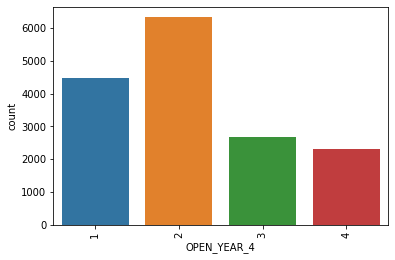

In [13]:
#show the graphic bars to above result 
df['OPEN_YEAR_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_YEAR_4'])

In [14]:
#How many problems were opens in each year
df['OPEN_YEAR_1'].value_counts(sort=True)

2013    3708
2012    3680
2014    2626
2015    1567
2017    1165
2016    1112
2011     812
2018     772
2019     360
Name: OPEN_YEAR_1, dtype: int64

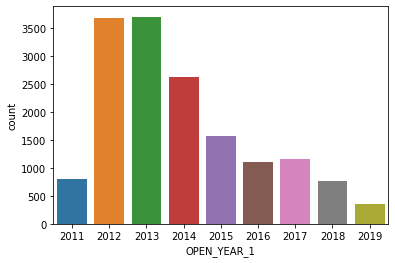

In [15]:
sns.countplot(df['OPEN_YEAR_1'])

### Apartir de 2015 o gráfico mostra um redução e estabilização. Antes disso o número de ocorrências eram muito acima dos valores atuais

In [16]:
#How many problems were opens in each months
df['OPEN_MONTH_4'].value_counts()

1    4659
2    3986
4    3585
3    3572
Name: OPEN_MONTH_4, dtype: int64

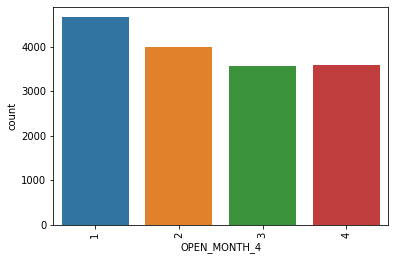

In [17]:
# show the graphic bars to above result
# df['D_MOTH_OPEN'].apply(lambda x: 0 if x == 99 else x).value_counts().sort_index().plot.bar()
df['OPEN_MONTH_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_MONTH_4'])

In [18]:
#How many problems were opens in each months
df['OPEN_MONTH_1'].value_counts()

3     1748
11    1592
1     1487
4     1462
2     1424
5     1411
9     1244
8     1239
6     1113
7     1089
10    1064
12     929
Name: OPEN_MONTH_1, dtype: int64

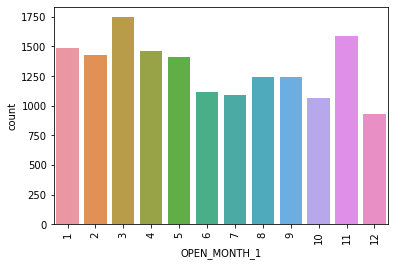

In [19]:
df['OPEN_MONTH_1'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_MONTH_1'])

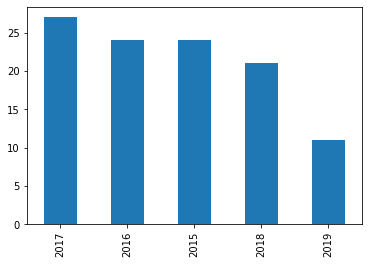

In [20]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().plot.bar()

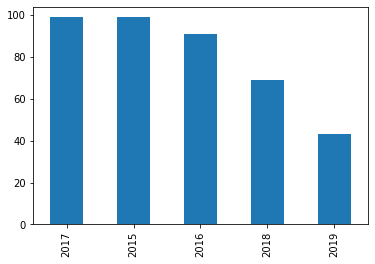

In [21]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().plot.bar()

Text(0, 0.5, 'Setor')

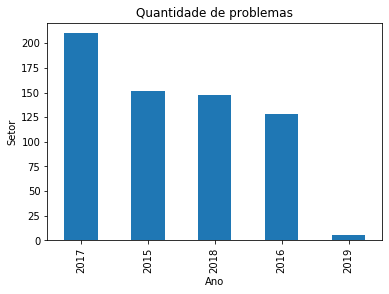

In [22]:
df[(df['OPEN_YEAR_1'] >= 2015) 
   & (df['HAS_VALUE'] == 'P') 
   & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().plot.bar()
plt.title("Quantidade de problemas")
plt.xlabel("Ano")
plt.ylabel("Setor")

In [23]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P')].groupby(['ESPC'])['ESPC'].count()

ESPC
bateria           176
cabo                4
fonte             401
hd                107
instalacao          2
placa             123
placa de rede      33
placa de video      1
ram                98
software           28
troca              14
Name: ESPC, dtype: int64

In [24]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P')].groupby(['EQUIP'])['EQUIP'].count()

EQUIP
computador       869
estabilizador      4
impressora         2
monitor            3
nobreak          642
notebook          19
Name: EQUIP, dtype: int64

In [25]:
print('Mean of troubles in hd since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in fonte since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in ram since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in placa since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in bateria since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in placa de rede since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in placa de video since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in nobreak since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in cabo since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().mean())

Mean of troubles in hd since 2015:  21.4
Mean of troubles in fonte since 2015:  80.2
Mean of troubles in ram since 2015:  19.6
Mean of troubles in placa since 2015:  24.6
Mean of troubles in bateria since 2015:  35.2
Mean of troubles in placa de rede since 2015:  6.6
Mean of troubles in placa de video since 2015:  1.0
Mean of troubles in nobreak since 2015:  128.4
Mean of troubles in cabo since 2015:  1.3333333333333333


In [26]:
#How many problems were opens in each days
df['OPEN_DAY_4'].value_counts()

4    5133
2    3809
3    3570
1    3290
Name: OPEN_DAY_4, dtype: int64

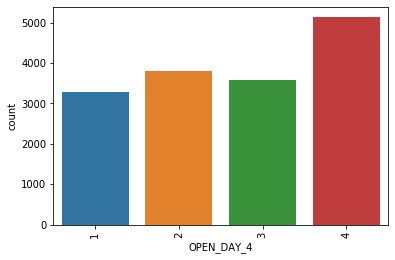

In [27]:
#show the graphic bars to above result 
df['OPEN_DAY_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_DAY_4'])

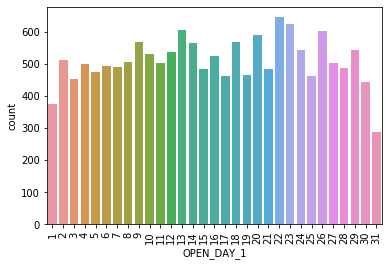

In [28]:
#show the graphic bars to above result 
df['OPEN_DAY_1'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_DAY_1'])

Text(0, 0.5, 'Quantidade de ocorrências')

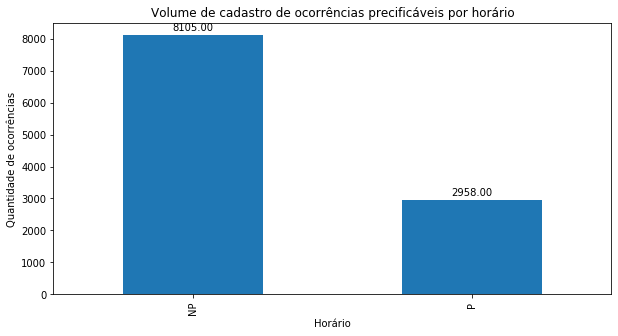

In [104]:
ndf = df['HAS_VALUE'].value_counts()

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências precificáveis por horário")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

In [114]:
((8105+2958)*100)/15802

70.01012530059486

In [74]:
# PERCENT OF MISSING PRICING VALUES IN ALL DATASET
(df['HAS_VALUE'].isna().sum() / df['DESCRIB'].count()) * 100

29.98987469940514

Text(0, 0.5, 'Quantidade de ocorrências')

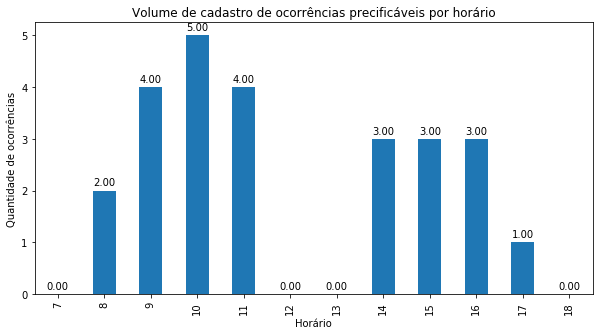

In [89]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015))]['HOUR_OPEN'].value_counts().sort_index()/5/12)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências precificáveis por horário")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

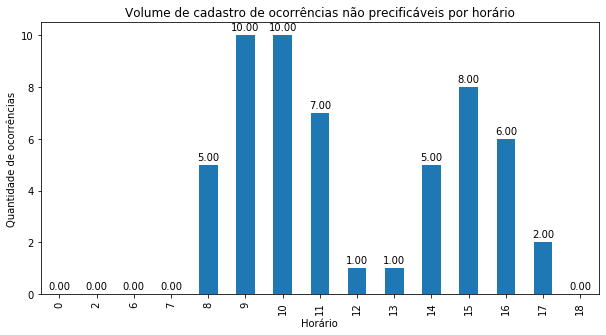

In [90]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] != 'P') & (df['OPEN_YEAR_1'] >= 2015))]['HOUR_OPEN'].value_counts().sort_index()/5/12)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências não precificáveis por horário")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

In [91]:
#show the graphic bars to above result 
ndf = round(df[(df['OPEN_YEAR_1'] >= 2015)]['HOUR_OPEN'].value_counts().sort_index()/5/12)

Text(0, 0.5, 'Quantidade de ocorrências')

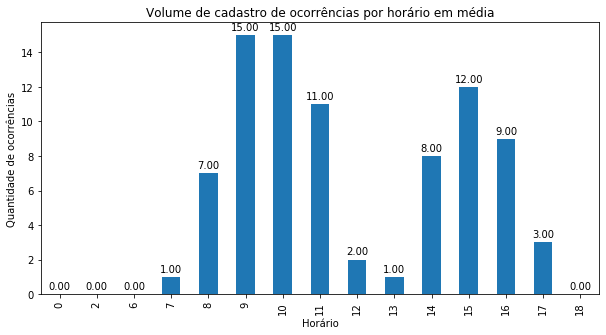

In [92]:
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

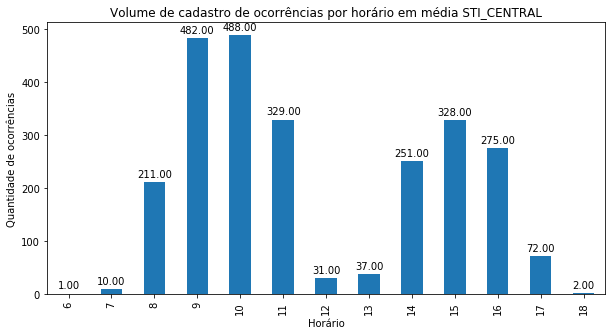

In [126]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_central'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média STI_CENTRAL")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

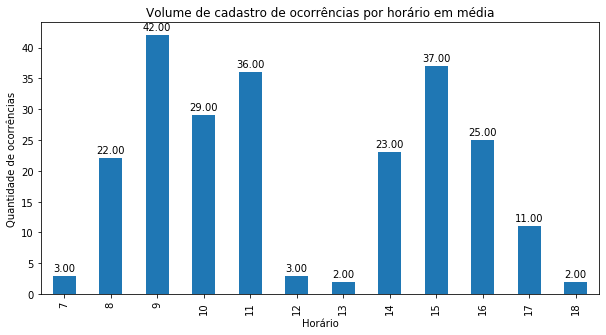

In [125]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cchl'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

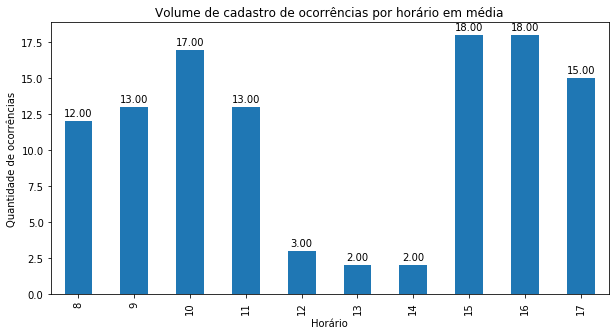

In [127]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_ct'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

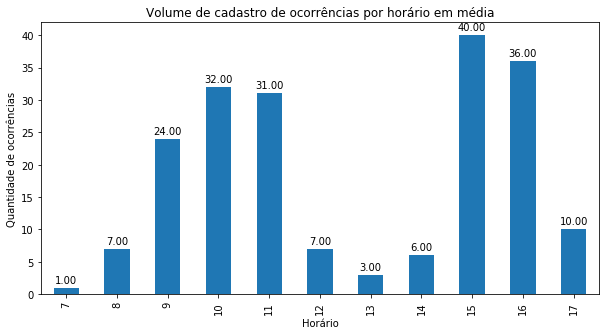

In [128]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cce'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

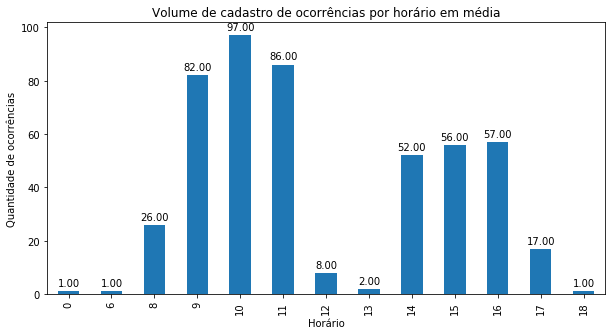

In [129]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_cca'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

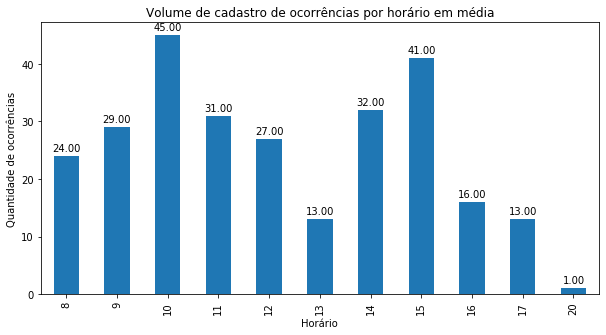

In [134]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_biblioteca') | (df['STI'] == 'biblioteca'))]['HOUR_OPEN'].value_counts().sort_index())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

### O turno da manhã contem maior fluxo de ocorrencias, em destaque os horarios de 10 as 12. A tarde, as 15h, ocorre um pico, porem menos relevante em comparação com o turno da manhã.

Text(0, 0.5, 'Quantidade de ocorrências')

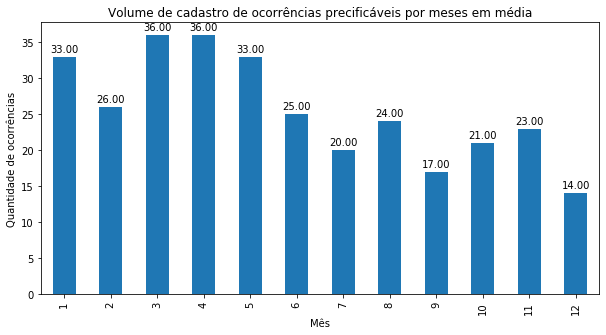

In [93]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015))]['OPEN_MONTH_1'].value_counts().sort_index()/5)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências precificáveis por meses em média")
plt.xlabel("Mês")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

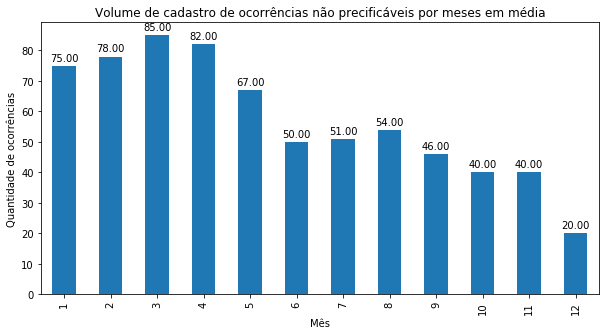

In [94]:
#show the graphic bars to above result 
ndf = round(df[((df['HAS_VALUE'] != 'P') & (df['OPEN_YEAR_1'] >= 2015))]['OPEN_MONTH_1'].value_counts().sort_index()/5)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências não precificáveis por meses em média")
plt.xlabel("Mês")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

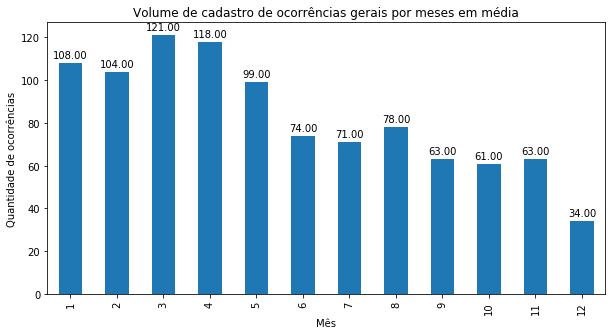

In [95]:
#show the graphic bars to above result 
ndf = round(df[(df['OPEN_YEAR_1'] >= 2015)]['OPEN_MONTH_1'].value_counts().sort_index()/5)

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências gerais por meses em média")
plt.xlabel("Mês")
plt.ylabel("Quantidade de ocorrências")

In [38]:
df[['DATA_OPEN','DATA_CLOSE','HOUR_OPEN','HOUR_CLOSE','MIN_OPEN','MIN_CLOSE']]

,DATA_OPEN,DATA_CLOSE,HOUR_OPEN,HOUR_CLOSE,MIN_OPEN,MIN_CLOSE
0,18/4/2012,26/4/2012,9,9,15,0
1,23/4/2014,23/4/2014,8,9,13,4
2,24/10/2011,24/10/2011,15,15,43,59
3,24/10/2011,26/10/2011,13,17,20,6
4,24/10/2011,26/10/2011,12,9,13,11
...,...,...,...,...,...,...
15797,13/9/2019,17/9/2019,15,8,23,21
15798,13/9/2019,13/9/2019,16,17,21,47
15799,16/9/2019,99/99/9999,16,-1,31,-1
15800,17/9/2019,99/99/9999,17,-1,35,-1


In [39]:
hour_efic = []
for D_open, D_close, H_open, H_close, M_open, M_close  in df[['DATA_OPEN','DATA_CLOSE','HOUR_OPEN','HOUR_CLOSE','MIN_OPEN','MIN_CLOSE']].values.tolist():
    if H_close == -1:
        hour_efic.append(-1)
    else:
        dtO = datetime.strptime(D_open +" "+ str(H_open) +" "+ str(M_open), '%d/%m/%Y %H %M')
        dtC = datetime.strptime(D_close +" "+ str(H_close) +" "+ str(M_close), '%d/%m/%Y %H %M')
        hour_efic.append(((dtO - dtC).seconds/60)/60)

In [40]:
df['HOUR_EFIC'] = hour_efic
df['HOUR_EFIC']

0         0.250000
1        23.150000
2        23.733333
3        20.233333
4         3.033333
           ...    
15797     7.033333
15798    22.566667
15799    -1.000000
15800    -1.000000
15801    -1.000000
Name: HOUR_EFIC, Length: 15802, dtype: float64

In [41]:
# mean of wasted time to solve a problem in general
df[df['HOUR_EFIC'] > 0]['HOUR_EFIC'].mean()

16.232680968956522

In [42]:
# mean of wasted time to solve a problem in general
df[(df['HOUR_EFIC'] > 0) & (df['STI'] != '0')].groupby(['STI'])['HOUR_EFIC'].mean()

STI
biblioteca        17.815891
campus            14.743398
hu                15.529710
sti_biblioteca    12.535000
sti_cca           15.071695
sti_cce           17.702756
sti_cchl          17.495388
sti_central       16.319242
sti_ct            16.742606
Name: HOUR_EFIC, dtype: float64

In [43]:
# mean of wasted time to solve a problem in general
ndf = df[(df['HOUR_EFIC'] > 0) & (df['STI'] != '0')].groupby(['STI', 'ESPC'])['HOUR_EFIC'].mean()

In [44]:
ndf

STI         ESPC         
biblioteca  bateria          23.783333
            fonte            17.506250
            hd               15.255556
            instalacao       20.000000
            placa            12.508333
                               ...    
sti_ct      instalacao       19.332381
            placa            19.730119
            placa de rede    15.120000
            ram              16.380952
            software         17.626667
Name: HOUR_EFIC, Length: 77, dtype: float64

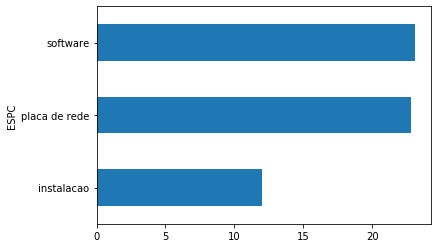

In [45]:
ndf['sti_biblioteca'].plot.barh()

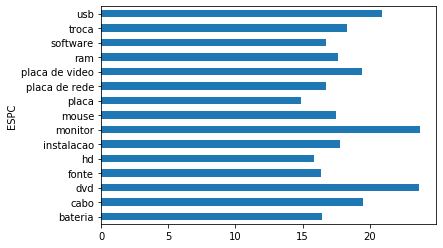

In [46]:
ndf['sti_central'].plot.barh()

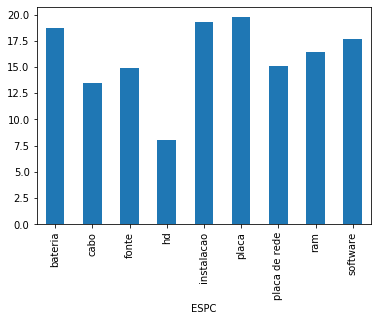

In [47]:
ndf['sti_ct'].plot.bar()

## Media de tempo gasto, por cada setor do STI, em relação a conclusão de problemas precificáveis

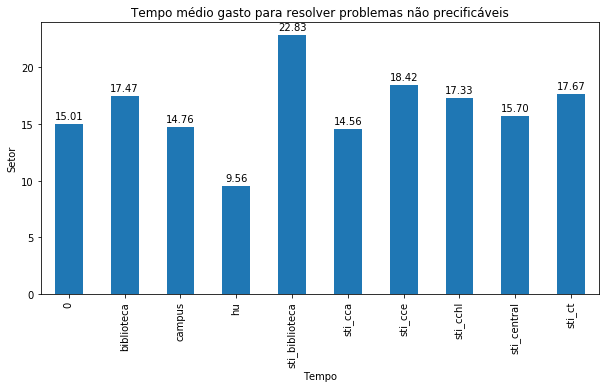

In [96]:
# mean of wasted time to solve a princify problem 
ndf = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P')].groupby('STI')['HOUR_EFIC'].mean()

plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
plt.title("Tempo médio gasto para resolver problemas não precificáveis")
plt.xlabel("Tempo")
plt.ylabel("Setor")

autolabel(ax.patches)

Text(0, 0.5, 'Quantidade de ocorrências')

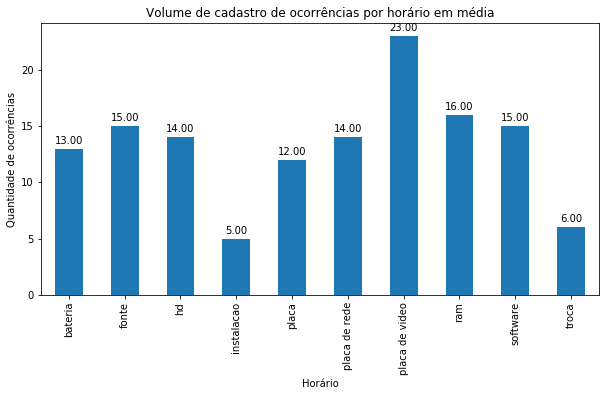

In [136]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_central'))].groupby('ESPC')['HOUR_EFIC'].mean())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

Text(0, 0.5, 'Quantidade de ocorrências')

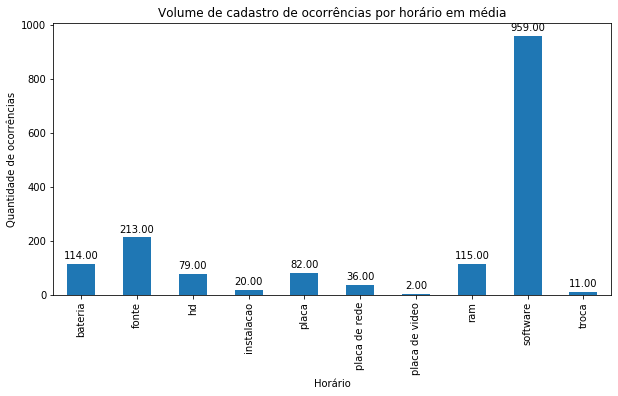

In [142]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['STI'] == 'sti_central'))].groupby('ESPC')['ESPC'].count())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.xlabel("Horário")
plt.ylabel("Quantidade de ocorrências")

In [148]:
hd = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['STI'].value_counts().sort_index()
fonte = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['STI'].value_counts().sort_index()
bateria = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['STI'].value_counts().sort_index()
ram = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['STI'].value_counts().sort_index()
placaR = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['STI'].value_counts().sort_index()
placaV = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['STI'].value_counts().sort_index()
placaM = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['STI'].value_counts().sort_index()
cabo = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['STI'].value_counts().sort_index()
nobreak = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['STI'].value_counts().sort_index()
estabilizador = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['STI'].value_counts().sort_index()

Text(0.5, 0, 'Especificação')

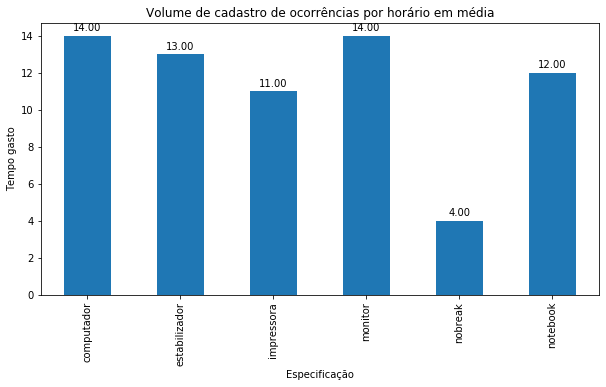

In [140]:
ndf = round(df[((df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P'))].groupby('EQUIP')['HOUR_EFIC'].mean())
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
autolabel(ax.patches)
plt.title("Volume de cadastro de ocorrências por horário em média")
plt.ylabel("Tempo gasto")
plt.xlabel("Especificação")

In [98]:
ndf = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] != 'P')].groupby('STI')['HOUR_EFIC'].mean()

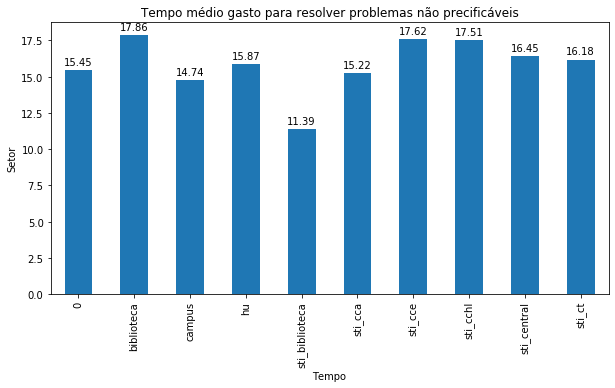

In [100]:
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
plt.title("Tempo médio gasto para resolver problemas não precificáveis")
plt.xlabel("Tempo")
plt.ylabel("Setor")

autolabel(ax.patches)

In [102]:
ndf = df[df['HOUR_EFIC'] > 0].groupby('STI')['HOUR_EFIC'].mean()

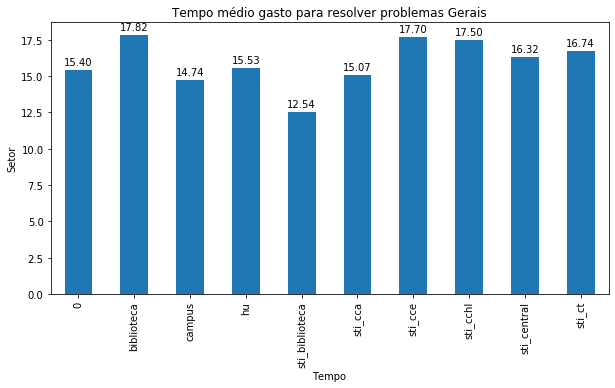

In [103]:
plt.figure(figsize = (10, 5))
ax = ndf.plot.bar()
plt.title("Tempo médio gasto para resolver problemas Gerais")
plt.xlabel("Tempo")
plt.ylabel("Setor")

autolabel(ax.patches)

In [67]:
# DEPARTMENT LOCALE
df['DEPARTMENT'].value_counts()

0                2617
ccn              2175
ccs              1977
cca              1487
cchl             1237
prad             1037
cce               862
ct                607
administracao     600
campus            425
preg              416
praec             378
nti               369
prppg             290
biblioteca        272
prex              219
proplan           160
cead              109
tropen            105
fadex              96
hu                 95
juizado            63
nintec             55
parfor             49
dce                36
ntf                27
noe                11
Name: DEPARTMENT, dtype: int64

## Quantidade Média, minima e máxima de cada produtor precificável agrupada por ano

In [52]:
df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015)]['ESPC'].value_counts()

fonte             342
bateria           108
hd                 97
placa              90
ram                84
placa de rede      28
software           24
troca               7
cabo                4
instalacao          1
placa de video      1
Name: ESPC, dtype: int64

### software não deveria esta na lista de problemas precificáveis

In [53]:
df[(df['HOUR_EFIC'] > 0) 
   & (df['HAS_VALUE'] == 'P') 
   & (df['OPEN_YEAR_1'] >= 2015) 
   & (df['ESPC'] == 'software')
  ]['DESCRIB']

10893    problema no sistema operacional e o teclado na...
10914    erro de inicializacao obs pericia medica forma...
10942    cpu nao inicia corretamente  formatado e troca...
11090    nao ligaformatar e instalar programas solucao ...
11604    nao esta inicializando a placa mae esta conden...
12406    inicializacao defeituosa foi trocada a bateria...
12666    bateria da cpu da prof regilda  bateria trocad...
12930    trocar a bateria do clock bateria trocada comp...
12956    trocar a bateria do clock bateria trocada e cp...
13208    formatacao formatacao de sistema operacional e...
13324    quebrado o computador foi formatado e trocada ...
13538    nao da sinal de tela obs hvu cga o monitor dev...
14295    checagem de computador de laboratorioformataca...
14296    checagem de computador de laboratorioformataca...
14366    nao liga________fazer backup dos documentos fo...
14696    lentotrocar a senha dos usuariosusuario admini...
14698    lento e virus troca de senha sem patrimonio  s.

### Pode-se verificar que as 24 ocorrencias de software **precificáveis** são de fato precificáveis porem a `class ESPC` **não** as classificou corretamente

In [54]:
hd = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().sort_index()
fonte = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().sort_index()
bateria = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().sort_index()
ram = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().sort_index()
placaR = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().sort_index()
placaV = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().sort_index()
placaM = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().sort_index()
cabo = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().sort_index()
nobreak = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().sort_index()
estabilizador = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().sort_index()
# print(hd)
# print(fonte)
# print(bateria)
# print(ram)
# print(placaR)
# print(placaV)
# print(placaM)
# print(cabo)
# print(nobreak)
# print(estabilizador)

## Produtos como cabo, estabilizadores e placas de video não apresentam valores expressivos

In [55]:
plt.rcParams['figure.figsize'] = (10,5)

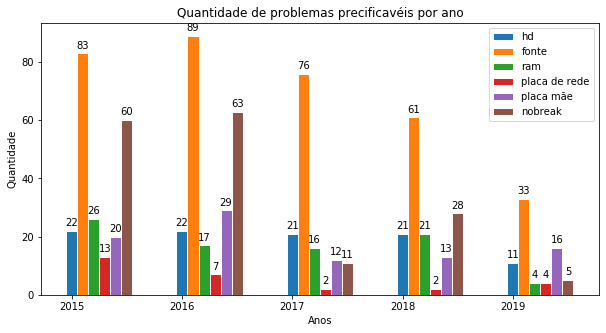

In [56]:
barWidth = 0.1  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r4]
#r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r6]
#r9 = [x + barWidth for x in r8]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, hd.values.tolist(), width=barWidth, edgecolor='white', label='hd')
rects2 = ax.bar(r2, fonte.values.tolist(), width=barWidth, edgecolor='white', label='fonte')
rects3 = ax.bar(r3, ram.values.tolist(), width=barWidth, edgecolor='white', label='ram')
rects4 = ax.bar(r4, placaR.values.tolist(), width=barWidth, edgecolor='white', label='placa de rede')
#rects5 = ax.bar(r5, placaV.values.tolist(), width=barWidth, edgecolor='white', label='placa de video')
rects6 = ax.bar(r6, placaM.values.tolist(), width=barWidth, edgecolor='white', label='placa mãe')
#rects7 = ax.bar(r7, cabo.values.tolist(), width=barWidth, edgecolor='white', label='cabos em geral')
rects8 = ax.bar(r8, nobreak.values.tolist(), width=barWidth, edgecolor='white', label='nobreak')
#rects9 = ax.bar(r9, estabilizador.values.tolist(), width=barWidth, edgecolor='white', label='estabilizador')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
#autolabel(rects5)
autolabel(rects6)
#autolabel(rects7)
autolabel(rects8)
#autolabel(rects9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_xlabel('Anos')
ax.set_title('Quantidade de problemas precificavéis por ano')
ax.set_xticklabels(['x','2015', '2016', '2017', '2018', '2019'])
ax.legend()

In [57]:
hd = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_MONTH_1'].value_counts().sort_index()/5
fonte = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_MONTH_1'].value_counts().sort_index()/5
bateria = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_MONTH_1'].value_counts().sort_index()/5
ram = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_MONTH_1'].value_counts().sort_index()/5
placaR = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_MONTH_1'].value_counts().sort_index()/5
placaV = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_MONTH_1'].value_counts().sort_index()/5
placaM = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_MONTH_1'].value_counts().sort_index()/5
cabo = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_MONTH_1'].value_counts().sort_index()/5
nobreak = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_MONTH_1'].value_counts().sort_index()/5
estabilizador = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_MONTH_1'].value_counts().sort_index()/5
print(hd)
# print(fonte)
# print(bateria)
# print(ram)
# print(placaR)
# print(placaV)
# print(placaM)
# print(cabo)
# print(nobreak)
# print(estabilizador)

1     0.8
2     1.0
3     3.8
4     2.8
5     1.2
6     2.0
7     1.4
8     1.2
9     1.6
10    1.2
11    1.2
12    1.2
Name: OPEN_MONTH_1, dtype: float64


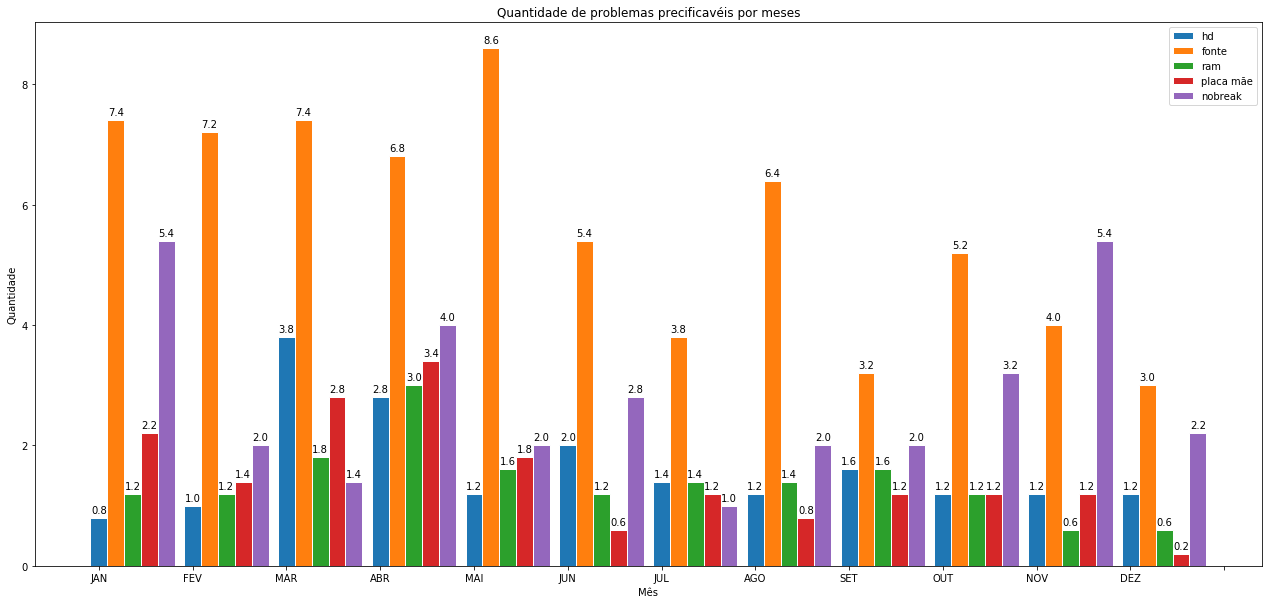

In [58]:
plt.rcParams['figure.figsize'] = (22,10)
barWidth = 0.18  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(12)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r3]
#r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r6]
#r9 = [x + barWidth for x in r8]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, hd.values.tolist(), width=barWidth, edgecolor='white', label='hd')
rects2 = ax.bar(r2, fonte.values.tolist(), width=barWidth, edgecolor='white', label='fonte')
rects3 = ax.bar(r3, ram.values.tolist(), width=barWidth, edgecolor='white', label='ram')
# rects4 = ax.bar(r4, placaR.values.tolist(), width=barWidth, edgecolor='white', label='placa de rede')
#rects5 = ax.bar(r5, placaV.values.tolist(), width=barWidth, edgecolor='white', label='placa de video')
rects6 = ax.bar(r6, placaM.values.tolist(), width=barWidth, edgecolor='white', label='placa mãe')
#rects7 = ax.bar(r7, cabo.values.tolist(), width=barWidth, edgecolor='white', label='cabos em geral')
rects8 = ax.bar(r8, nobreak.values.tolist(), width=barWidth, edgecolor='white', label='nobreak')
#rects9 = ax.bar(r9, estabilizador.values.tolist(), width=barWidth, edgecolor='white', label='estabilizador')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)
autolabel(rects6)
#autolabel(rects7)
autolabel(rects8)
#autolabel(rects9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_xlabel('Mês')
ax.set_title('Quantidade de problemas precificavéis por meses')
ax.set_xticks((0,1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'])
ax.legend()

## Definição dos mínimos

In [59]:
hd_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().mean())
fonte_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().mean())
bateria_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().mean())
ram_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().mean())
placaR_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().mean())
placaV_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().mean())
placaM_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().mean())
cabo_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().mean())
nobreak_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().mean())
estabilizador_min = round(df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().mean())

## Definição dos máximos

In [60]:
hd_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().max()
fonte_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().max()
bateria_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().max()
ram_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().max()
placaR_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().max()
placaV_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().max()
placaM_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().max()
cabo_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().max()
nobreak_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().max()
estabilizador_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().max()

In [61]:
print(hd_min)
print(fonte_min)
print(ram_min)
print(placaR_min)
print(placaM_min)
print(nobreak_min)
print("-------------")
print(hd_max)
print(fonte_max)
print(ram_max)
print(placaR_max)
print(placaM_max)
print(nobreak_max)

19
68
17
6
18
33
-------------
22
89
26
13
29
63


# Otimização Multiobjetivo

- Minimixar f(x1,x2,x3,x4,x5,x6) = - x1 - 0*x2 - 0*x3 - 0*x4 - 0*x3 - 0*x6;
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - x2 - 0*x3 - 0*x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - x3 - 0*x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - 0*x4 - x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - 0*x4 - 0*x3 - x6; 

- g(x1,x2,x3,x4,x3,x6) = - x1*valueX1 - x2*valueX2 - x3*valueX3 - x4*valueX4 - x5*valueX5 - x6*valueX6 >= Orcamento

- f(x1,x2,x3,x4,x5,x6) → x1 <= mean.x2ear(x1) or x1 <= Minimixar.year(x1)
- f(x1,x2,x3,x4,x5,x6) → x2 <= mean.x2ear(x2) or x2 <= Minimixar.year(x2)
- f(x1,x2,x3,x4,x5,x6) → x3 <= mean.x2ear(x3) or x3 <= Minimixar.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x4 <= mean.x2ear(x4) or x4 <= Minimixar.year(x4)
- f(x1,x2,x3,x4,x5,x6) → x3 <= mean.x2ear(x3) or x3 <= Minimixar.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x6 <= mean.x2ear(x6) or x6 <= Minimixar.year(x6)

- f(x1,x2,x3,x4,x5,x6) → x1 >= 0 or x1 >= min.year(x1)
- f(x1,x2,x3,x4,x5,x6) → x2 >= 0 or x2 <= min.year(x2)
- f(x1,x2,x3,x4,x5,x6) → x3 >= 0 or x3 <= min.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x4 >= 0 or x4 >= min.year(x4)
- f(x1,x2,x3,x4,x5,x6) → x3 >= 0 or x3 >= min.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x6 >= 0 or x6 >= min.year(x6)

* x1 = hd;
* x2 = fonte;
* x3 = ram;
* x4 = nb; 
* x5 = placaR;
* x6 = placaM;

In [62]:
valueX1 = 89.90 #Americanas.com
valueX2 = 59.99 #Americanas
valueX3 = 103.90 #Shopee
valueX4 = 743.76 #KaBuM! 
valueX5 = 23.99 #Americanas.com
valueX6 = 199.49 #Mercado Livre

In [63]:
# conda install -c conda-forge autograd
# first, import PuLP
import pulp


In [64]:

# then, conduct initial declaration of problem
linearProblem = pulp.LpProblem("Maximizing for first objective",pulp.LpMaximize)

# delcare optimization variables, using PuLP
# x1 = pulp.LpVariable("x1", lowBound=hd_min, upBound=hd_max)  
# x2 = pulp.LpVariable("x2", lowBound=fonte_min, upBound=fonte_max)
# x3 = pulp.LpVariable("x3", lowBound=ram_min, upBound=ram_max)
# x4 = pulp.LpVariable("x4", lowBound=nobreak_min, upBound=nobreak_max)
# x5 = pulp.LpVariable("x5", lowBound=placaR_min, upBound=placaR_max)
# x6 = pulp.LpVariable("x6", lowBound=placaM_min, upBound=placaM_max)

x1 = pulp.LpVariable("x1", lowBound=0, upBound=hd_max)
x2 = pulp.LpVariable("x2", lowBound=0, upBound=fonte_max)
x3 = pulp.LpVariable("x3", lowBound=0, upBound=ram_max)
x4 = pulp.LpVariable("x4", lowBound=0, upBound=nobreak_max)
x5 = pulp.LpVariable("x5", lowBound=0, upBound=placaR_max)
x6 = pulp.LpVariable("x6", lowBound=0, upBound=placaM_max)

# add (first) objective function to the linear problem statement
linearProblem += x1 + x2 + x3 + x4 + x5 + x6

# add the constraints to the problem
linearProblem += x1*valueX1 + x2*valueX2 + x3*valueX3 + x4*valueX4 + x5*valueX5 + x6*valueX6 <= 10000

# solve with default solver, maximizing the first objective
solution = linearProblem.solve()

# output information if optimum was found, what the maximal objective value is and what the optimal point is
print(str(pulp.LpStatus[solution])+
      "\n Max Total = "+str(round(pulp.value(linearProblem.objective)))+
      "\n hd = "+str(round(pulp.value(x1)))+
      "\n fonte = "+str(round(pulp.value(x2)))+
      "\n ram = "+str(round(pulp.value(x3)))+
      "\n nobreak = "+str(round(pulp.value(x4)))+
      "\n placaR = "+str(round(pulp.value(x5)))+
      "\n placaM = "+str(round(pulp.value(x6))))
valor = pulp.value(x1)*valueX1 + pulp.value(x2)*valueX2 + pulp.value(x3)*valueX3 + pulp.value(x4)*valueX4 + pulp.value(x5)*valueX5 + pulp.value(x6)*valueX6
print("Total R$: "+str(round(valor)))

Optimal
 Max Total = 147
 hd = 22
 fonte = 89
 ram = 23
 nobreak = 0
 placaR = 13
 placaM = 0
Total R$: 10000
